In [1]:
import pandas as pd
import numpy as np


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar los distintos test
# ------------------------------------------------------------------------------

from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway
from sklearn.linear_model import LinearRegression

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

/Users/ana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/ana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [4]:
df_pair = pd.read_csv('ficheros/marketing_AB.csv', sep=',', index_col=0)

In [5]:
df_pair.head(5)

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [4]:
df_pair.shape
#grupo ad y psa
#no hay datos duplicados, no hay nulos

(588101, 6)

In [5]:
df_pair['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64


Ejericicios de A/B Testing
Ejercicio 1:

Supongamos que estamos realizando un experimento para determinar si un nuevo diseño de anuncio (test group "ad") tiene un impacto significativo en la tasa de conversión en comparación con el diseño de anuncio anterior (test group "psa").

- Objetivo del ejercicio: Comparar las tasas de conversión entre los grupos de prueba "ad" y "psa" para determinar si el nuevo diseño de anuncio es más efectivo en la conversión de usuarios.
- Pasos que debemos seguir:
 - Preparación de los datos: Asegúrate de que los datos estén limpios y listos para el análisis. Esto incluye la eliminación de datos faltantes y la verificación de la coherencia de los datos.

 - Definición de las hipótesis: Plantea una hipótesis nula (H0) y una hipótesis alternativa (H1) para el experimento (en este caso os las damos definidas):
- Hipótesis nula (H0): No hay diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".

- Hipótesis alternativa (H1): Existe una diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".

 - Cálculo de la tasa de conversión: Calcula la tasa de conversión para cada grupo:
- Para el grupo "ad", la tasa de conversión es el número de usuarios convertidos dividido por el número total de usuarios en ese grupo.

- Para el grupo "psa", realiza el mismo cálculo.

 - Prueba de hipótesis: Utiliza una prueba estadística, como la prueba t de Student o la prueba chi-cuadrado, para comparar las tasas de conversión entre los grupos "ad" y "psa".

 - Análisis de resultados:
Si el valor p es menor que un umbral predefinido (por ejemplo, 0.05), rechazamos la hipótesis nula y concluimos que hay una diferencia significativa en las tasas de conversión entre los grupos.
Si el valor p es mayor que el umbral, no podemos rechazar la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que hay una diferencia significativa.

 - Conclusiones y recomendaciones: Basándote en los resultados de la prueba de hipótesis, llega a una conclusión sobre si el nuevo diseño de anuncio es más efectivo en la conversión de usuarios que el diseño anterior. Si es así, puedes hacer recomendaciones basadas en estos hallazgos.


- Hipótesis nula (H0): No hay diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".

- Hipótesis alternativa (H1): Existe una diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".

Preparamos los datos

In [6]:
#Miramos si hay nulos
df_pair.isnull().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [7]:
#miramos si hay duplicados
df_pair.duplicated().sum()

0

In [8]:
#Miramos variables numericas y categóricas
df_pair.select_dtypes(exclude='O').describe()

,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


In [10]:
df_pair.select_dtypes(include='O').describe()

,test group,most ads day
count,588101,588101
unique,2,7
top,ad,Friday
freq,564577,92608


In [7]:
df_pair.head(7)
#Hay dos grupos ad y psa 

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
5,1137664,ad,False,734,Saturday,10
6,1116205,ad,False,264,Wednesday,13


In [11]:
#Calculamos la tasa de conversion por grupo 
#usuarios convertidos /numero total de usuarios del grupo
#df_pair['converted'].value_counts()

#Para esto nos creamos dos data Frame, uno por grupo, y calculamos la tasa de conversión de cada grupo
df_ad= df_pair[df_pair['test group']== 'ad']
df_ad.head(5)

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [15]:

#Tasa de cnversion para el grupo ad.
tasa_ad_converted = np.round(df_ad[df_ad['converted'] == True].shape[0] / df_ad.shape[0],3)
tasa_ad_converted 


0.026

In [16]:
df_psa = df_pair[df_pair['test group'] == 'psa']
tasa_psa_converted = np.round(df_psa[df_psa['converted'] == True].shape[0]/df_psa.shape[0],3)
tasa_psa_converted

0.018

In [17]:
# Crear un DataFrame con las columnas que necesitamos para comparar ambos grupos con el porcentaje de convertidos y no convertidos
data_p = {'Grupo': ['ad', 'ps'],'tasa_converted': [np.round(df_ad[df_ad['converted'] == True].shape[0] / df_ad.shape[0],3),np.round(df_psa[df_psa['converted'] == True].shape[0]/df_psa.shape[0],3) ],
         'tasa_sin_converted' : [np.round(df_ad[df_ad['converted'] == False].shape[0] / df_ad.shape[0],3),np.round(df_psa[df_psa['converted'] == False].shape[0]/df_psa.shape[0],3) ]}
df_p = pd.DataFrame(data_p)
df_p.head()

,Grupo,tasa_converted,tasa_sin_converted
0,ad,0.026,0.974
1,ps,0.018,0.982


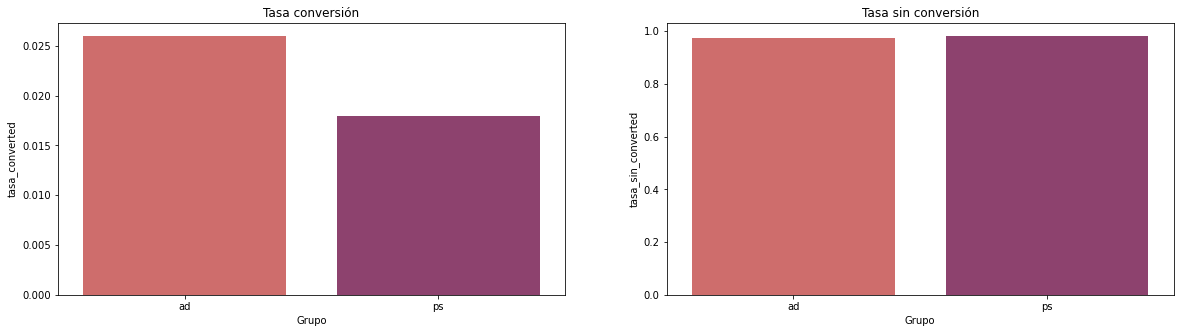

In [18]:
#Visualizamos el dataframe anterior. La diferencia en la tasa de conversion del grupo 'ad' que ve el nuevo anuncio y el grupo psa que ve el anterior
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.barplot(x="Grupo", y="tasa_converted", data=df_p,  palette = "flare", ax = axes[0])
sns.barplot(x="Grupo", y="tasa_sin_converted", data=df_p,  palette = "flare", ax = axes[1])

axes[0].set_title("Tasa conversión")
axes[1].set_title("Tasa sin conversión");

Con el método Prueba de proporciones podemos comparar ambos grupos segun su porcentaje de tasas de conversión 

In [19]:
#El primer paso es crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df_p['Grupo'], df_p['tasa_converted'])

# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia)

alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa en las tasas de conversiíon entre ambos grupos")
    print('Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas')
else:
    print("No hay evidencia de una diferencia significativa en las tasas de conversión entre los grupos.")
    print("\n ---------- \n")
    print( 'Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas')

No hay evidencia de una diferencia significativa en las tasas de conversión entre los grupos.

 ---------- 

Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas


Si bien en el gráfico se ve que la tasa de conversion del grupo que ve el nuevo anuncio es un poco mas alta, los resultados indican que no hay diferencia significativa entre ambos grupos. Se podría evaluar el costo de ese nuevo anuncio si vale la pena o no invertir en dicho anuncio

Ejercicio 2:

En este caso, vamos a realizar un experimento para comparar la cantidad promedio de anuncios vistos por los usuarios en los grupos "ad" y "psa" y determinar si hay una diferencia significativa entre ellos.

 - Objetivo del experimento: Comparar la cantidad promedio de anuncios vistos por usuario entre los grupos de prueba "ad" y "psa" para determinar si el tipo de anuncio afecta la cantidad de anuncios que los usuarios ven.

 - Preparación de los datos: Asegúrate de que los datos estén limpios y listos para el análisis. Esto incluye la eliminación de datos faltantes y la verificación de la coherencia de los datos.

 - Hipótesis: Plantea una hipótesis nula (H0) y una hipótesis alternativa (H1) para el experimento. En este caso, las deberéis plantear vosotras

 -Prueba de hipótesis: Utiliza una prueba estadística, como la prueba t de Student, para comparar la cantidad promedio de anuncios vistos por usuario entre los grupos "ad" y "psa". Esto te permitirá determinar si hay una diferencia significativa entre los dos grupos.

 - Análisis de resultados:
Si el valor p (p-value) es menor que un umbral predefinido (por ejemplo, 0.05), rechazamos la hipótesis nula y concluimos que hay una diferencia significativa en la cantidad promedio de anuncios vistos por usuario entre los grupos.
Si el valor p es mayor que el umbral, no podemos rechazar la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que hay una diferencia significativa.

 - Conclusiones y recomendaciones: Basándote en los resultados de la prueba de hipótesis, llega a una conclusión sobre si el tipo de anuncio (ad o psa) tiene un impacto significativo en la cantidad promedio de anuncios vistos por usuario. Si es así, puedes hacer recomendaciones basadas en estos hallazgos.

- Hipotesis Nula: La hipotesis nula sugiere que no hay diferencia significativa entre ambos grupos
- Hipotesis Alternativa: sugiere que hay diferencia entre ambos grupos

In [8]:
df_pair.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [9]:
#calculamos la media de anuncions vistos por grupo 

df_promedio_ads_grupos = df_pair.groupby('test group')['total ads'].mean().reset_index()
df_promedio_ads_grupos 

,test group,total ads
0,ad,24.823365
1,psa,24.761138


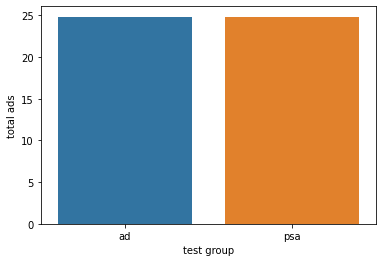

In [10]:
sns.barplot(x = 'test group', y = 'total ads', data=df_promedio_ads_grupos );

In [12]:

psa_group_t = df_promedio_ads_grupos[df_promedio_ads_grupos['test group'] == 'psa']['total ads']
ad_group_t = df_promedio_ads_grupos[df_promedio_ads_grupos['test group'] == 'ad']['total ads']


t_stat, p_value = ttest_ind(psa_group_t, ad_group_t)

# Imprimir el resultado de la prueba
if p_value < 0.05:
    print("Hay una diferencia significativa en el promedio de anuncios vistos  entre el grupo ad y el grupo psa.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          Por lo tanto, nuestro nuevo sistema tiene los efectos deseados y deberíamos cambiar la nueva versión de anuncios   
          """)
else:
    print("No hay evidencia de una diferencia significativa en el promedio de anuncios vistos entre los grupos.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          el análisis estadístico nos sugiera que estas diferencias no son significativas, 
          por lo que la nueva campaña no esta ayudando a nuestro problema.   
          """)

No hay evidencia de una diferencia significativa en el promedio de anuncios vistos entre los grupos.

 ---------- 


          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          el análisis estadístico nos sugiera que estas diferencias no son significativas, 
          por lo que la nueva campaña no esta ayudando a nuestro problema.   
          
